## 현대 포트폴리오 이론

### 효율적 투자선 그리기


In [6]:
#시총 상위권 4개 암거나
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['현대자동차', 'NAVER', '셀트리온', '카카오']
df = pd.DataFrame()
for i in stocks:
    df[i] = mk.get_daily_price(i, '2019-01-17', '2021-01-17')['close']

In [7]:
df

,현대자동차,NAVER,셀트리온,카카오
date,,,,
2019-01-17,129500,136000,195500,98500
2019-01-18,131000,137500,201000,99600
2019-01-21,127000,131000,198000,98800
2019-01-22,127500,130000,200000,102000
2019-01-23,129000,132500,200000,102500
2019-01-24,130000,129500,208000,102000
2019-01-25,128500,130000,208500,102500
2019-01-28,126500,132000,211000,102000
2019-01-29,128000,136000,210500,102000


In [8]:
#종목별 일간수익률, 연간 수익률, 일간리스크(변동성), 연간리스크 구하자
#pct_change 판다스 수익률 구하는 함수
daily_ret = df.pct_change() #종가 대신 일간 변동률을 구해야해서 pct_change() 함수 사용
annual_ret = daily_ret.mean()* 248 #248은 2020년 개장일수
daily_cov = daily_ret.cov() #일간리스크는 공분산으로 구해준다
annual_cov = daily_ret.cov()*248

In [10]:
daily_ret.head()

,현대자동차,NAVER,셀트리온,카카오
date,,,,
2019-01-17,NaN,NaN,NaN,NaN
2019-01-18,0.011583,0.011029,0.028133,0.011168
2019-01-21,-0.030534,-0.047273,-0.014925,-0.008032
2019-01-22,0.003937,-0.007634,0.010101,0.032389
2019-01-23,0.011765,0.019231,0.000000,0.004902


In [11]:
daily_cov.head()

,현대자동차,NAVER,셀트리온,카카오
현대자동차,0.000700,0.000153,0.000182,0.000150
NAVER,0.000153,0.000534,0.000172,0.000308
셀트리온,0.000182,0.000172,0.000892,0.000186
카카오,0.000150,0.000308,0.000186,0.000509


In [20]:
#수익률, 리스크를 비중을 다르게 해 포토프폴리오에 저장 할 리스트 생성

port_ret = []
port_risk = []
port_weights = []

### 몬테카를로 시뮬레이션

In [21]:
# 시총 상위 4종목으로 구성된 포폴 20000개 생성 할 거임
# 넘파이 랜덤 함수를 사용해서 4종목의 비중을 모두 다르게 할꺼
# 매우 많은 난수를 이용해 함수 값을 확률적으로 계산하는것을 몬테카를로 시뮬레이션이라 한다

for _ in range(20000): #반복횟수를 사용할 일이 없기 때문에 _변수에 할당
    weights = np.random.random(len(stocks)) #4개의 랜덤 숫자로 구성된 배열
    weights /= np.sum(weights) #4개의 랜덤숫자를 랜덤숫자 총합으로 나눠 4종목 비중 합이 1이 되도록 조정
    
    returns = np.dot(weights, annual_ret) #종목별 비중 배열과 연간수익율을 곱해서 전체수익률을 구한다
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    #종목별 연간공분산과 비중 배열을 곱하고 다시 종목별 비중의 전치로 곱한다 그리고 루트 딱 = 전체 리스크  
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    #포트폴리오 20000개 수익률을 리스트에 추가
    
portfolio = {'Returns' : port_ret, 'Risk' : port_risk}
for i, s in enumerate(stocks): #알다시피 i 값은 0부터 순서, s 값은 키값인 현차,네이버, 셀트,카카오 순
    portfolio[s] = [weights[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [14]:
weights

array([0.16986638, 0.31653975, 0.25470871, 0.25888516])

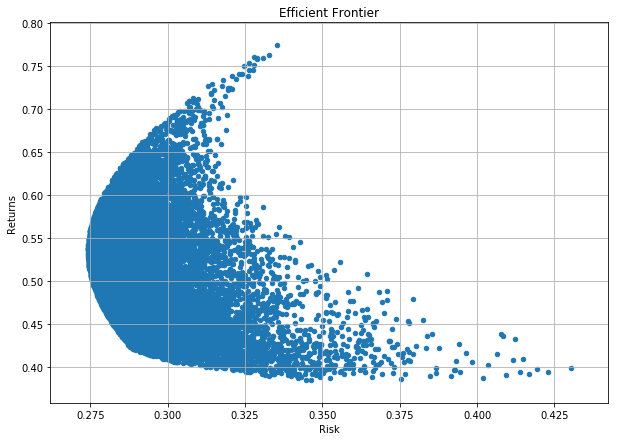

In [23]:
#효율적 투자선 그래프 
df.plot.scatter(x = 'Risk', y = 'Returns', figsize = (10,7),grid= True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.show()

## 샤프지수

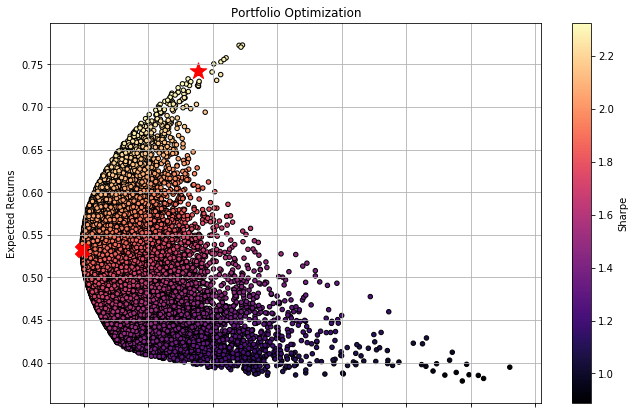

In [31]:
#시총 상위권 4개 암거나
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['현대자동차', 'NAVER', '셀트리온', '카카오']
df = pd.DataFrame()
for i in stocks:
    df[i] = mk.get_daily_price(i, '2019-01-17', '2021-01-17')['close']
    

#종목별 일간수익률, 연간 수익률, 일간리스크(변동성), 연간리스크 구하자
#pct_change 판다스 수익률 구하는 함수
daily_ret = df.pct_change() #종가 대신 일간 변동률을 구해야해서 pct_change() 함수 사용
annual_ret = daily_ret.mean()* 248 #248은 2020년 개장일수
daily_cov = daily_ret.cov() #일간리스크는 공분산으로 구해준다
annual_cov = daily_ret.cov()*248

#수익률, 리스크를 비중을 다르게 해 포토프폴리오에 저장 할 리스트 생성

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio =[] #샤프지수 들어갈 리스트 만들고

# 시총 상위 4종목으로 구성된 포폴 20000개 생성 할 거임
# 넘파이 랜덤 함수를 사용해서 4종목의 비중을 모두 다르게 할꺼
# 매우 많은 난수를 이용해 함수 값을 확률적으로 계산하는것을 몬테카를로 시뮬레이션이라 한다

for _ in range(20000): #반복횟수를 사용할 일이 없기 때문에 _변수에 할당
    weights = np.random.random(len(stocks)) #4개의 랜덤 숫자로 구성된 배열
    weights /= np.sum(weights) #4개의 랜덤숫자를 랜덤숫자 총합으로 나눠 4종목 비중 합이 1이 되도록 조정
    
    returns = np.dot(weights, annual_ret) #종목별 비중 배열과 연간수익율을 곱해서 전체수익률을 구한다
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    #종목별 연간공분산과 비중 배열을 곱하고 다시 종목별 비중의 전치로 곱한다 그리고 루트 딱 = 전체 리스크  
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) #포트폴리오 수익율을 리스크로 나눈 값을 샤프지수 리스트에 추가
    #포트폴리오 20000개 수익률을 리스트에 추가
    
portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Sharpe':sharpe_ratio}
for i, s in enumerate(stocks): #알다시피 i 값은 0부터 순서, s 값은 키값인 현차,네이버, 셀트,카카오 순
    portfolio[s] = [weights[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()] #샤프지수 컬럼에서 샤프 지숫값이 제일 큰 행을 max로 지정
min_risk = df.loc[df['Risk'] == df['Risk'].min()] #리스크가 제일 작은걸 min_risk로 지정

#산점도 
df.plot.scatter(x ='Risk', y ='Returns', c='Sharpe', cmap = 'magma', edgecolors='k',
               figsize = (11,7), grid= True)
plt.scatter(x = max_sharpe['Risk'], y=max_sharpe['Returns'], c ='r',
           marker = '*', s=300)#샤프지수가 가장 큰 포트폴리오를 별표
plt.scatter(x = min_risk['Risk'], y=min_risk['Returns'], c ='r',
           marker = 'X', s=200)#리스크가 제일 작은 표시를 x표
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [32]:
max_sharpe

,Returns,Risk,Sharpe,현대자동차,NAVER,셀트리온,카카오
2102,0.741963,0.319046,2.325567,0.135812,0.056728,0.192102,0.615359


In [33]:
min_risk

,Returns,Risk,Sharpe,현대자동차,NAVER,셀트리온,카카오
8150,0.532159,0.274282,1.940185,0.135812,0.056728,0.192102,0.615359


### 볼린저밴드

end_date is initialized to '2021-01-18'


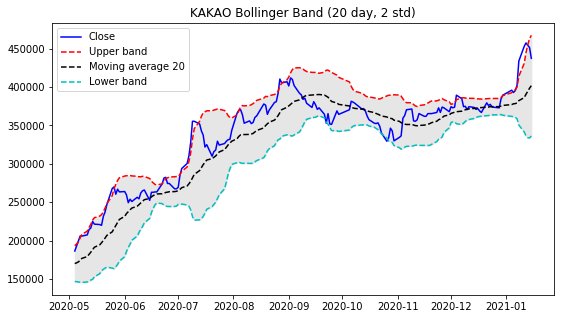

In [46]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2020-04-02')

df['MA20'] = df['close'].rolling(window = 20).mean() #20개 종가를 이용해서 평균을 구하자
df['stddev'] = df['close'].rolling(window = 20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2) #중간 밴드+ 2표준편차 = 상단
df['lower'] = df['MA20'] - (df['stddev']*2) #중간 밴드- 2표준편차 = 하단
df = df[19:] #1~19는 nan이므로 20번째부터 ㄱ

plt.figure(figsize=(9, 5))
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')#중간
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')#하단
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #상단과 하단 사이에 회색으로 칠하자
plt.legend(loc='best')
plt.title('KAKAO Bollinger Band (20 day, 2 std)')
plt.show()

end_date is initialized to '2021-01-18'


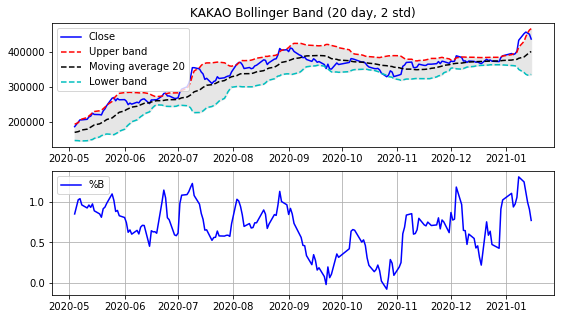

In [47]:
#%b ㅍ포함해서그리기
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2020-04-02')

df['MA20'] = df['close'].rolling(window = 20).mean() #20개 종가를 이용해서 평균을 구하자
df['stddev'] = df['close'].rolling(window = 20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2) #중간 밴드+ 2표준편차 = 상단
df['lower'] = df['MA20'] - (df['stddev']*2) #중간 밴드- 2표준편차 = 하단
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower']) #%b 식
df = df[19:] #1~19는 nan이므로 20번째부터 ㄱ

plt.figure(figsize=(9, 5))
plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')#중간
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')#하단
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #상단과 하단 사이에 회색으로 칠하자
plt.legend(loc='best')
plt.title('KAKAO Bollinger Band (20 day, 2 std)')

plt.subplot(2,1,2)
plt.plot(df.index, df['PB'], color ='b', label = '%B')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

end_date is initialized to '2021-01-18'


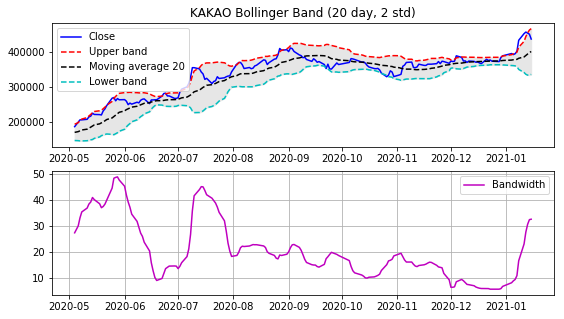

In [48]:
#밴드폭
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2020-04-02')

df['MA20'] = df['close'].rolling(window = 20).mean() #20개 종가를 이용해서 평균을 구하자
df['stddev'] = df['close'].rolling(window = 20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2) #중간 밴드+ 2표준편차 = 상단
df['lower'] = df['MA20'] - (df['stddev']*2) #중간 밴드- 2표준편차 = 하단
df['bandwidth'] = (df['upper']-df['lower'])/df['MA20']*100 #밴드폭 공식
df = df[19:] #1~19는 nan이므로 20번째부터 ㄱ

plt.figure(figsize=(9, 5))
plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')#중간
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')#하단
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #상단과 하단 사이에 회색으로 칠하자
plt.legend(loc='best')
plt.title('KAKAO Bollinger Band (20 day, 2 std)')

plt.subplot(2,1,2)
plt.plot(df.index, df['bandwidth'], color ='m', label = 'Bandwidth')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## 현금흐름지표(MFI)

In [49]:
df['TP'] = (df['high']+df['low']+df['close'])/3 #중심가격을 구한다
df['PMF'] = 0 #긍정적 현금 흐름
df['NMF'] = 0 #부정적 현금 흐름
for i in range(len(df.close)-1): #range 함수는 마지막을 포함 안하니 0부터 종가개수 -2까지
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]#
        df.NMF.values[i+1]=0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
    df['MFR'] = df.PMF.rolling(window=10).sum()/df.NMF.rolling(window=10).sum()
    df['MF10']=100-100/(1+df['MFR'])

end_date is initialized to '2021-01-18'


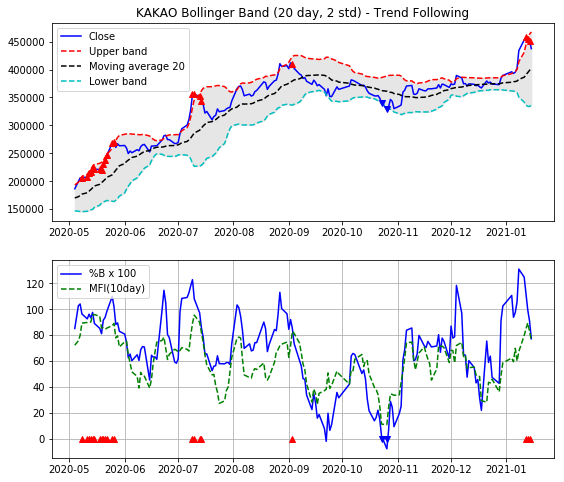

In [56]:
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2020-04-02')

df['MA20'] = df['close'].rolling(window = 20).mean() #20개 종가를 이용해서 평균을 구하자
df['stddev'] = df['close'].rolling(window = 20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2) #중간 밴드+ 2표준편차 = 상단
df['lower'] = df['MA20'] - (df['stddev']*2) #중간 밴드- 2표준편차 = 하단
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower']) #%b 식

#mfi10
df['TP'] = (df['high']+df['low']+df['close'])/3 #중심가격을 구한다
df['PMF'] = 0 #긍정적 현금 흐름
df['NMF'] = 0 #부정적 현금 흐름
for i in range(len(df.close)-1): #range 함수는 마지막을 포함 안하니 0부터 종가개수 -2까지
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]#
        df.NMF.values[i+1]=0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
    df['MFR'] = df.PMF.rolling(window=10).sum()/df.NMF.rolling(window=10).sum()
    df['MFI10']=100-100/(1+df['MFR'])

df = df[19:] #1~19는 nan이므로 20번째부터 ㄱ

plt.figure(figsize=(9, 8))
plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')#중간
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')#하단
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #상단과 하단 사이에 회색으로 칠하자

for i in range(len(df.close)):
    if df.PB.values[i]> 0.8 and df.MFI10.values[i]>80: 
        #매수시점 화살표 작성 : %b가 0.8q보다 크고 10일 기준 mfi가 80보다 크면 화살표
        plt.plot(df.index.values[i], df.close.values[i],'r^')
    elif df.PB.values[i]<0.2 and df.MFI10.values[i]<20:
        #매도시점 화살표작성: %b가 0.2보다 작고 MFI가 20보다 작으면 파란 삼각형 표시
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc='best')
plt.title('KAKAO Bollinger Band (20 day, 2 std) - Trend Following')

plt.subplot(2,1,2)
plt.plot(df.index, df['PB']*100, 'b', label = '%B x 100')
plt.plot(df.index, df['MFI10'], 'g--',label = 'MFI(10day)') 
plt.yticks([-20,0,20,40,60,80,100,120])
for i in range(len(df.close)):
    if df.PB.values[i]> 0.8 and df.MFI10.values[i]>80: 
        #매수시점 화살표 작성 : %b가 0.8q보다 크고 10일 기준 mfi가 80보다 크면 화살표
        plt.plot(df.index.values[i], 0,'r^')
    elif df.PB.values[i]<0.2 and df.MFI10.values[i]<20:
        #매도시점 화살표작성: %b가 0.2보다 작고 MFI가 20보다 작으면 파란 삼각형 표시
        plt.plot(df.index.values[i],0, 'bv')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## 볼린저밴드 + 일중강도율

end_date is initialized to '2021-01-19'


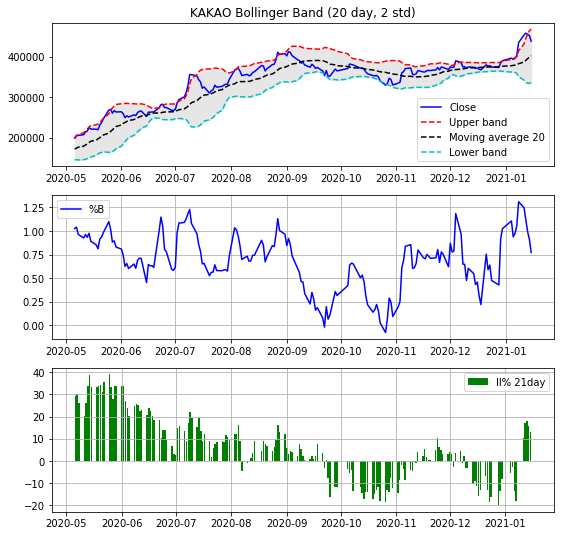

In [58]:
#%b 포함해서그리기
#일중강도율 포함
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2020-04-02')

df['MA20'] = df['close'].rolling(window = 20).mean() #20개 종가를 이용해서 평균을 구하자
df['stddev'] = df['close'].rolling(window = 20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2) #중간 밴드+ 2표준편차 = 상단
df['lower'] = df['MA20'] - (df['stddev']*2) #중간 밴드- 2표준편차 = 하단
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower']) #%b 식

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
#종가 고가 저가 거래량을 이용해 일중강도 II를 구함
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
#21일간 일중강도 II합을 21일간 거래량 합으로 나누어 일중강도율 II%를 구한다
df = df.dropna()
#df = df[19:] #1~19는 nan이므로 20번째부터 ㄱ

plt.figure(figsize=(9, 9))
plt.subplot(3,1,1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')#중간
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')#하단
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #상단과 하단 사이에 회색으로 칠하자
plt.title('KAKAO Bollinger Band (20 day, 2 std)')

plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(df.index, df['PB'], color ='b', label = '%B')
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(3,1,3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
plt.grid(True)
plt.legend(loc='best')
plt.show()

end_date is initialized to '2021-01-19'


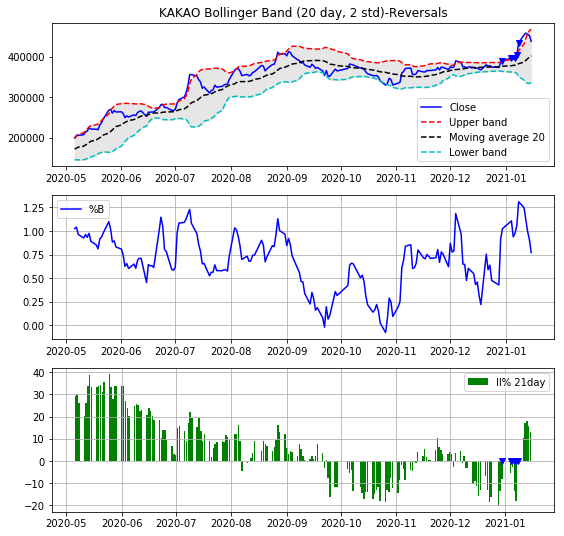

In [61]:
#%b 포함해서그리기
#일중강도율 포함
#반전 매매 구현
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2020-04-02')

df['MA20'] = df['close'].rolling(window = 20).mean() #20개 종가를 이용해서 평균을 구하자
df['stddev'] = df['close'].rolling(window = 20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2) #중간 밴드+ 2표준편차 = 상단
df['lower'] = df['MA20'] - (df['stddev']*2) #중간 밴드- 2표준편차 = 하단
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower']) #%b 식

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
#종가 고가 저가 거래량을 이용해 일중강도 II를 구함
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
#21일간 일중강도 II합을 21일간 거래량 합으로 나누어 일중강도율 II%를 구한다
df = df.dropna()
#df = df[19:] #1~19는 nan이므로 20번째부터 ㄱ

plt.figure(figsize=(9, 9))
plt.subplot(3,1,1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')#중간
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')#하단
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #상단과 하단 사이에 회색으로 칠하자
plt.title('KAKAO Bollinger Band (20 day, 2 std)-Reversals')
for i in range(len(df.close)):
    if df.PB.values[i]< 0.05 and df.IIP21.values[i]>0: 
        #매수시점 화살표 작성 : %b가 0.5보다 작고 10일 기준 II%가 0보다 크면 화살표
        plt.plot(df.index.values[i], df.close.values[i],'r^')
    elif df.PB.values[i]>0.95 and df.IIP21.values[i]<0:
        #매도시점 화살표작성: %b가 0.95보다 크고 II가 0보다 작으면 파란 삼각형 표시
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(df.index, df['PB'], color ='b', label = '%B')
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(3,1,3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(len(df.close)):
    if df.PB.values[i]< 0.05 and df.IIP21.values[i]>0: 
        #매수시점 화살표 작성 : %b가 0.5보다 작고 10일 기준 II%가 0보다 크면 화살표
        plt.plot(df.index.values[i], 0,'r^')
    elif df.PB.values[i]>0.95 and df.IIP21.values[i]<0:
        #매도시점 화살표작성: %b가 0.95보다 크고 II가 0보다 작으면 파란 삼각형 표시
        plt.plot(df.index.values[i],0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 삼중창 매매 시스템

end_date is initialized to '2021-01-19'


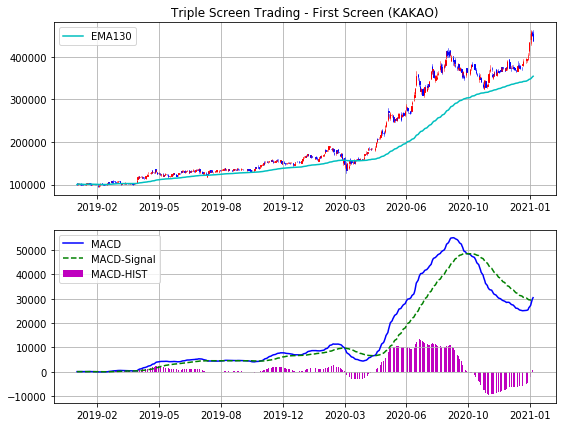

In [71]:
#첫번째 창
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-01')

ema60 = df.close.ewm(span=60).mean() #종가의 12주 지수 이동평균, ewm = 이동평균 함수,span= 일수
ema130 = df.close.ewm(span=130).mean()#종가의 26주 지수 이동평균
macd = ema60-ema130  #macd
signal = macd.ewm(span=45).mean() #신호선(macd 9주 이동평균)
macdhist = macd-signal #macd 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
              macdhist= macdhist).dropna() #assign 데이터 프레임 열추가하는거
df['number'] = df.index.map(mdates.date2num)#날짜형 인덱스 숫자형으로 변환
ohlc = df[['number','open','high','low','close']]

plt.figure(figsize = (9,7))
p1 = plt.subplot(2,1,1)
plt.title('Triple Screen Trading - First Screen (KAKAO)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup ='red',
                colordown='blue') #ohlc의 숫자형 일자,시가,고가,저가,종가 값으로 그린다
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color ='c', label ='EMA130')
plt.legend(loc = 'best')

p2 = plt.subplot(2,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color = 'm', label ='MACD-HIST')
plt.plot(df.number, df['macd'], color = 'b', label ='MACD')
plt.plot(df.number, df['signal'], 'g--', label ='MACD-Signal')
plt.legend(loc='best')
plt.show()


In [67]:
!pip install matplotlib

end_date is initialized to '2021-01-19'


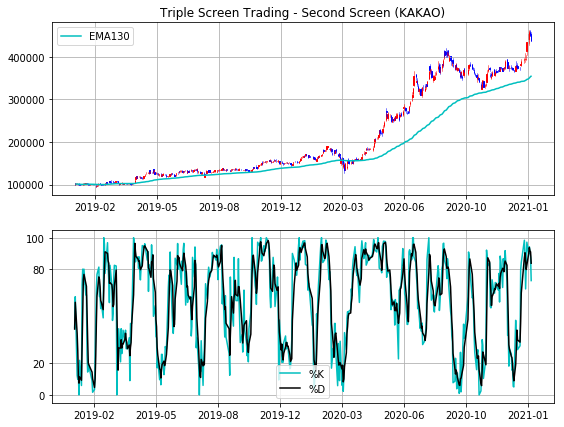

In [73]:
#두번째 창
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-01')

ema60 = df.close.ewm(span=60).mean() #종가의 12주 지수 이동평균, ewm = 이동평균 함수,span= 일수
ema130 = df.close.ewm(span=130).mean()#종가의 26주 지수 이동평균
macd = ema60-ema130  #macd
signal = macd.ewm(span=45).mean() #신호선(macd 9주 이동평균)
macdhist = macd-signal #macd 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
              macdhist= macdhist).dropna() #assign 데이터 프레임 열추가하는거
df['number'] = df.index.map(mdates.date2num)#날짜형 인덱스 숫자형으로 변환
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window = 14, min_periods =1).max()
#14일 동안 최댓값을 구한다, min_period = 1을 지정하면 14일 전체가 없어도 1개의 데이터만 있어도 최댓값 나타내줌
ndays_low = df.low.rolling(window=14, min_periods = 1).min()#최소값
fast_k = (df.close -ndays_low)/(ndays_high - ndays_low) * 100 #빠른 선%K구해준다
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d = slow_d).dropna()

plt.figure(figsize=(9,7))
p1 = plt.subplot(2,1,1)
plt.title('Triple Screen Trading - Second Screen (KAKAO)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup ='red', colordown = 'blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color = 'c', label ='EMA130')
plt.legend(loc = 'best')

p1 = plt.subplot(2,1,2)
plt.grid(True)
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'],color = 'c', label = '%K')
plt.plot(df.number, df['slow_d'],color = 'k', label = '%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()

end_date is initialized to '2021-01-19'


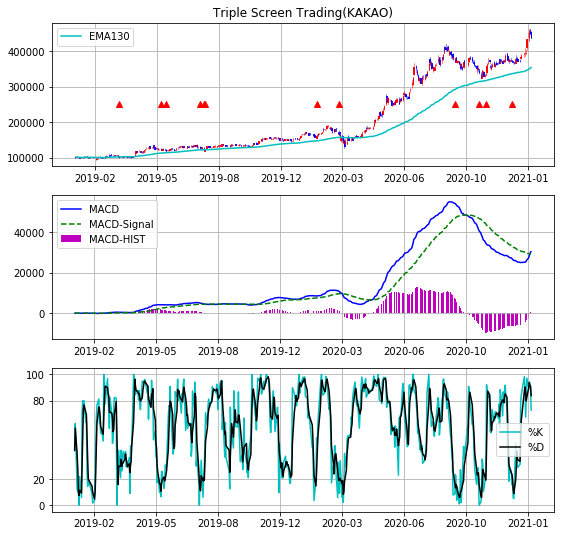

In [74]:
#화살표 표시 전체코드
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-01')

ema60 = df.close.ewm(span=60).mean() #종가의 12주 지수 이동평균, ewm = 이동평균 함수,span= 일수
ema130 = df.close.ewm(span=130).mean()#종가의 26주 지수 이동평균
macd = ema60-ema130  #macd
signal = macd.ewm(span=45).mean() #신호선(macd 9주 이동평균)
macdhist = macd-signal #macd 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
              macdhist= macdhist).dropna() #assign 데이터 프레임 열추가하는거
df['number'] = df.index.map(mdates.date2num)#날짜형 인덱스 숫자형으로 변환
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window = 14, min_periods =1).max()
#14일 동안 최댓값을 구한다, min_period = 1을 지정하면 14일 전체가 없어도 1개의 데이터만 있어도 최댓값 나타내줌
ndays_low = df.low.rolling(window=14, min_periods = 1).min()#최소값
fast_k = (df.close -ndays_low)/(ndays_high - ndays_low) * 100 #빠른 선%K구해준다
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d = slow_d).dropna()

plt.figure(figsize=(9,9))
p1 = plt.subplot(3,1,1)
plt.title('Triple Screen Trading(KAKAO)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup ='red', colordown = 'blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color = 'c', label ='EMA130')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1]< df.ema130.values[i] and df.slow_d.values[i-1]>= 20 and df.slow_d.values[i]<20:
        plt.plot(df.number.values[i],250000, 'r^')
    elif df.ema130.values[i-1]> df.ema130.values[i] and df.slow_d.values[i-1]<= 80 and df.slow_d.values[i]>80:  
        plt.plot(df.number.values[i], 250000, 'bv')
plt.legend(loc = 'best')

p2 = plt.subplot(3,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color = 'm', label ='MACD-HIST')
plt.plot(df.number, df['macd'], color = 'b', label ='MACD')
plt.plot(df.number, df['signal'], 'g--', label ='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3,1,3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'],color = 'c', label = '%K')
plt.plot(df.number, df['slow_d'],color = 'k', label = '%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()

## 듀얼 모멘텀 전략 코드

In [136]:
#듀얼 모멘텀 코드
import pandas as pd
import pymysql
from datetime import datetime
from datetime import timedelta
from Investar import Analyzer

class DualMomentum:
    def __init__(self):
        '''생성자: KRX 종목코드(codes)를 구하기 위한 MarketDB 객체 생성'''
        self.mk = Analyzer.MarketDB()
        
    def get_rltv_momentum(self, start_date, end_date, stock_count):
        '''특정 기간 동안 수익률이 제일 높았던 stock_count 개의 종목들 (상대 모멘텀)
            - start_date : 상대 모멘텀을 구할 시작일자 ('2020-01-01')
            - end_date   : 상대 모멘텀을 구할 종료일자 ('2020-12-31')
            - stock_count: 상대 모멘텀을 구할 종목 수
        '''
        connection = pymysql.connect(host = '127.0.0.1', port = 3307, db ='INVESTAR',
                            user = 'root', passwd='dhqud4892', autocommit = True)
        cursor = connection.cursor()
        
        sql = f"select max(date) from daily_price where date <= '{start_date}'"
        cursor.execute(sql) #daily_price 테이블로 입력한 일자와 같거나 작은 일자 조회, 실제 거래일 구한다
        result = cursor.fetchone() # sql 읽어주는 함수 fetchone
        if (result[0] is None):
            print ("start_date : {} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d') #디비에서 조회된 거래일을 변환해서 반영
        
        sql = f"select max(date) from daily_price where date <= '{end_date}'"
        cursor.execute(sql) #daily_price 테이블로 입력한 일자와 같거나 작은 일자 조회, 실제 거래일 구한다
        result = cursor.fetchone() # sql 읽어주는 함수 fetchone
        if (result[0] is None):
            print ("end_date : {} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d') #디비에서 조회된 거래일을 변환해서 반영
        
        #종목별 수익률 계산
        #상대 모멘텀은 종목별 수익률 계산하는 거니까 시작일자, 종료일자 종가 조회해서 구하자
        rows = [] #rows 라는 빈 리스트를 만들고 2차원 리스트로 처리하자
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(self.mk.codes):
            sql = f"select close from daily_price where code = '{code}' and date = '{start_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
        
            old_price = int(result[0]) #시작일자 가격 조회
            sql = f"select close from daily_price where code = '{code}' and date = '{end_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
        
            new_price = int(result[0]) #종료일자 가격 조회
            returns = (new_price / old_price -1)* 100 #해당 종목의 수익률
            rows.append([code, self.mk.codes[code], old_price, new_price, returns])
            #종목별로 구한 코드, 명, 구 가격 , 신 가격, 수익률을 rows에 2차원 형태로 추가
        
        # 상대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        df = df.head(stock_count)
        df.index = pd.Index(range(stock_count))
        connection.close()
        print(df)
        print(f"\nRelative momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}% \n")
        return df
    def get_abs_momentum(self, rltv_momentum, start_date, end_date):
        """특정 기간 동안 상대 모멘텀에 투자했을 때의 평균 수익률 (절대 모멘텀)
            - rltv_momentum : get_rltv_momentum() 함수의 리턴값 (상대 모멘텀)
            - start_date    : 절대 모멘텀을 구할 매수일 ('2020-01-01')   
            - end_date      : 절대 모멘텀을 구할 매도일 ('2020-12-31')
        """
        stockList = list(rltv_momentum['code'])        
        connection = pymysql.connect(host = '127.0.0.1', port = 3307, 
            db='INVESTAR', user='root', passwd='dhqud4892', autocommit=True)
        cursor = connection.cursor()


        # 사용자가 입력한 매수일을 DB에서 조회되는 일자로 변경 
        sql = f"select max(date) from daily_price "\
            f"where date <= '{start_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("{} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d')


        # 사용자가 입력한 매도일을 DB에서 조회되는 일자로 변경 
        sql = f"select max(date) from daily_price "\
            f"where date <= '{end_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("{} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d')


        # 상대 모멘텀의 종목별 수익률을 구해서 2차원 리스트 형태로 추가
        rows = []
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(stockList):            
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{start_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            old_price = int(result[0])
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{end_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            new_price = int(result[0])
            returns = (new_price / old_price - 1) * 100
            rows.append([code, self.mk.codes[code], old_price, new_price,
                returns])


        # 절대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        connection.close()
        print(df)
        print(f"\nAbasolute momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}%")
        return

In [122]:
        # 절대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        connection.close()
        print(df)
        print(f"\nAbasolute momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}%")
        return

NameError: name 'rows' is not defined

In [137]:
dm = DualMomentum()
rm = dm.get_rltv_momentum('2020-01-01', '2020-06-30',19)

      code    company  old_price  new_price     returns
0   037270    YG PLUS       1370       3305  141.240876
1   008350      남선알미늄       3230       6170   91.021672
2   011070      LG이노텍     140000     174500   24.642857
3   001390      KG케미칼      12000      13000    8.333333
4   013700      까뮤이앤씨       1270       1200   -5.511811
5   011420    갤럭시아에스엠       1485       1340   -9.764310
6   064960     S&T모티브      42750      37900  -11.345029
7   066570       LG전자      72100      63200  -12.343967
8   014530       극동유화       3445       3010  -12.626996
9   096770    SK이노베이션     150000     131000  -12.666667
10  155660        DSR       4590       3795  -17.320261
11  294870  HDC현대산업개발      25650      21100  -17.738791
12  024070     WISCOM       2660       2165  -18.609023
13  010130       고려아연     425000     335000  -21.176471
14  100840       S&TC      19800      15400  -22.222222
15  001250      GS글로벌       2220       1645  -25.900901
16  037560     LG헬로비전       6050       3990  -34

In [138]:
am = dm.get_abs_momentum(rm, '2020-01-01', '2020-06-30')

      code    company  old_price  new_price     returns
0   037270    YG PLUS       1370       3305  141.240876
1   008350      남선알미늄       3230       6170   91.021672
2   011070      LG이노텍     140000     174500   24.642857
3   001390      KG케미칼      12000      13000    8.333333
4   013700      까뮤이앤씨       1270       1200   -5.511811
5   011420    갤럭시아에스엠       1485       1340   -9.764310
6   064960     S&T모티브      42750      37900  -11.345029
7   066570       LG전자      72100      63200  -12.343967
8   014530       극동유화       3445       3010  -12.626996
9   096770    SK이노베이션     150000     131000  -12.666667
10  155660        DSR       4590       3795  -17.320261
11  294870  HDC현대산업개발      25650      21100  -17.738791
12  024070     WISCOM       2660       2165  -18.609023
13  010130       고려아연     425000     335000  -21.176471
14  100840       S&TC      19800      15400  -22.222222
15  001250      GS글로벌       2220       1645  -25.900901
16  037560     LG헬로비전       6050       3990  -34